In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#plt.style.use('seaborn-whitegrid')

In [2]:
df = pd.read_excel('autoMPG_data.xlsx')

In [3]:
df.head()

,GallonsPer100Miles,GallonsPer100MilesTo1981,MPG,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year,Year70To81,Origin,Origin.Eq.1,Origin.Eq.2,Origin.Eq.3,Name
0,5.555556,5.555556,18.0,8,3.07,1.30,3.504,12.0,70,1,1,1,0,0,chevrolet chevelle malibu
1,6.666667,6.666667,15.0,8,3.50,1.65,3.693,11.5,70,1,1,1,0,0,buick skylark 320
2,5.555556,5.555556,18.0,8,3.18,1.50,3.436,11.0,70,1,1,1,0,0,plymouth satellite
3,6.250000,6.250000,16.0,8,3.04,1.50,3.433,12.0,70,1,1,1,0,0,amc rebel sst
4,5.882353,5.882353,17.0,8,3.02,1.40,3.449,10.5,70,1,1,1,0,0,ford torino


In [4]:
df['Weight1000lb'].min()

1.613

In [5]:
df['Weight1000lb'].max()

5.14

<AxesSubplot:>

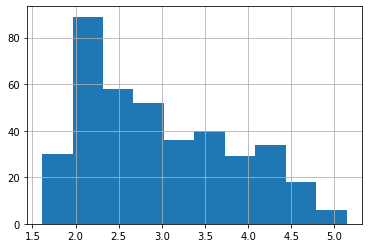

In [6]:
df['Weight1000lb'].hist()

<AxesSubplot:>

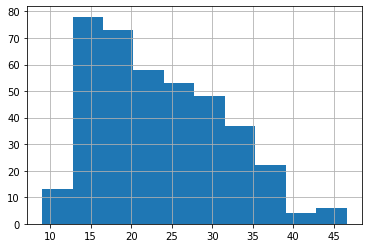

In [7]:
df['MPG'].hist()

In [ ]:
# let's see the scatter plots and have the regression line fitted also for illustrations
sns.pairplot(df, kind = 'reg')

In [ ]:
df.corr()

In [ ]:
# heatmap korrelaatiokertoimista
#sns.heatmap(df.corr(), annot = True)
sns.heatmap(df.corr())

In [ ]:
# Let's check MPG and Weight1000lb as a jointplot
ax1 = sns.jointplot(data = df, x = 'MPG', y = 'Weight1000lb')
#ax1 = sns.jointplot(data = df, x = 'MPG', y = 'Horsepower100')

In [ ]:
# On the other hand, let's see what happens if we use X='GallonsPer100Miles' instead
ax1 = sns.jointplot(data = df, x = 'GallonsPer100Miles', y = 'Weight1000lb')
#ax1 = sns.jointplot(data = df, x = 'GallonsPer100Miles', y = 'Horsepower100')
#ax1 = sns.jointplot(data = df, x = 'Weight1000lb', y = 'GallonsPer100Miles', kind='reg')

In [ ]:
# Let's prepare the data for the regression model
X = df['Weight1000lb'].to_frame()  # to_frame() makes it dataframe as now it would only be a Series!

# This is the independent variable -> you could have taken more variables into your model as there can be more than one dependent variables

In [ ]:
y = df['GallonsPer100Miles']  # This is your dependent variable - or the target variable that you want to predict 

In [ ]:
# Now that we have the data, let's start training the model

In [ ]:
from sklearn.linear_model import LinearRegression

fuel_model = LinearRegression().fit(X,y)

In [ ]:
fuel_model.coef_

In [ ]:
fuel_model.intercept_

In [ ]:
# Let's just predict first that how many GallonsPer100Miles would it take based on the model if the car would weight 1000lb
fuel_model.predict(pd.DataFrame([3]))   # This value is on the interpolation range

In [ ]:
fuel_model.predict(pd.DataFrame([1]))   # This value is on the extrapolation range

In [ ]:
#Let's plot the model error terms as a scatterplot
# X = Weight1000lb
# y = GallonsPer100Miles
plt.scatter(fuel_model.predict(X), fuel_model.predict(X)-y)

plt.hlines(y=0,xmin=2,xmax=9)


In [ ]:
#Coefficient of determination
fuel_model.score(X,y)

In [ ]:
# Hence, the model explains 78.3% of fuel consumtion